<a href="https://colab.research.google.com/github/isahaasasu/MAT422/blob/main/HW2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Homework 2.3**

## Joint Probability Distributions



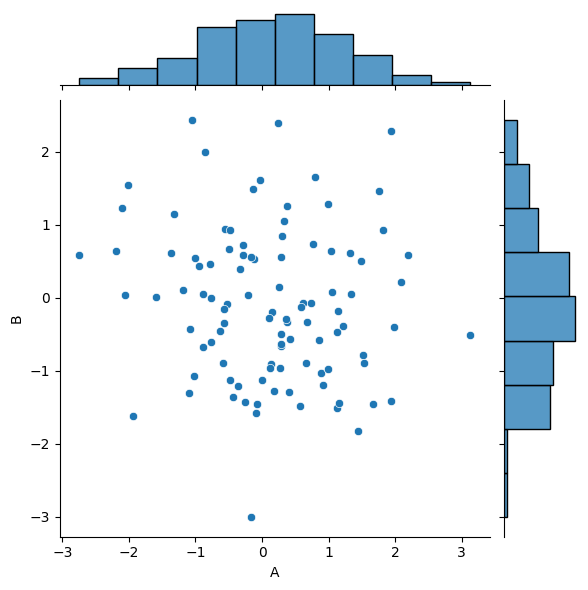

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

# generate normal random variables
A = np.random.normal(size=100)
B = np.random.normal(size=100)

# create normal distribution plots
df = pd.DataFrame({'A' : A , 'B':B})

# creates jointplot using seaborn
sns.jointplot(x='A', y='B' ,data=df )

## Correlation and Dependence

In [2]:
# Define the dataset
x = np.array([1,3,5,7,8,9, 10, 15])
y = np.array([10, 20, 30, 40, 50, 60, 70, 80])

In [3]:
def Pearson_correlation(X,Y):
    if len(X)==len(Y):
        Sum_xy = sum((X-X.mean())*(Y-Y.mean()))
        Sum_x_squared = sum((X-X.mean())**2)
        Sum_y_squared = sum((Y-Y.mean())**2)
        corr = Sum_xy / np.sqrt(Sum_x_squared * Sum_y_squared)
    return corr

print(Pearson_correlation(x,y))  # shows relationship between x and y
print(Pearson_correlation(x,x), "\n")  # shows relationship between x and x (should be 1)

print("Correlation using numpy:\n", np.corrcoef(x, y))

0.974894414261588
1.0 

Correlation using numpy:
 [[1.         0.97489441]
 [0.97489441 1.        ]]


In [4]:
seed = 13
rand = np.random.RandomState(seed)

x = rand.uniform(0,1,100)
x = np.vstack((x,x*2+1))
x = np.vstack((x,-x[0,]*2+1))
x = np.vstack((x,rand.normal(1,3,100)))

After the first uniform distribution, we've stacked a few variable sets vertically - the second and first have a positive relation, the third and first have a complete negative correlation, and the fourth is fullyrandom, so it should have a ~0 correlation.

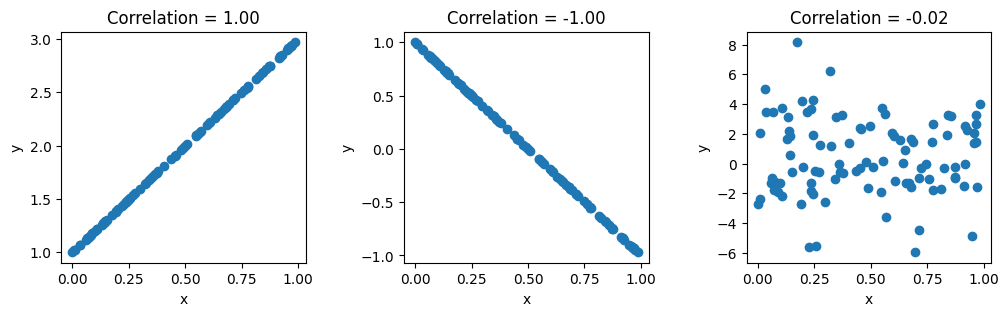

In [5]:
import matplotlib.pyplot as plt

rho = np.corrcoef(x)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
for i in [0,1,2]:
  ax[i].scatter(x[0,],x[1+i,])
  ax[i].title.set_text('Correlation = ' + "{:.2f}".format(rho[0,i+1]))
  ax[i].set(xlabel='x',ylabel='y')

fig.subplots_adjust(wspace=.4)
plt.show()

In [6]:
# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.888


In [7]:
# calculate the spearmans's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate spearman's correlation
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.872


## Random Samples

In [8]:
# import random
from random import sample

# Prints list of random items of given length
list1 = [1, 2, 3, 4, 5]

print(sample(list1,3))

[5, 1, 2]


In [9]:
import random

list1 = [1, 2, 3, 4, 5, 6]
print("With list:", random.sample(list1, 3))

# Prints list of random items of length 3 from the given list.
string = "GeeksforGeeks"
print("With string:", random.sample(string, 4))

# Prints list of random items of length 4 from the given tuple.
tuple1 = ("ankit", "geeks", "computer", "science",
                   "portal", "scientist", "btech")
print("With tuple:", random.sample(tuple1, 4))

# Prints list of random items of length 3 from the given set.
set1 = {"a", "b", "c", "d", "e"}
print("With set:", random.sample(set1, 3))

With list: [6, 5, 4]
With string: ['f', 'k', 'e', 'o']
With tuple: ['computer', 'ankit', 'geeks', 'portal']
With set: ['e', 'b', 'd']


<ipython-input-9-ab8899c9f79c>:17: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  print("With set:", random.sample(set1, 3))


### Central Limit Theorem

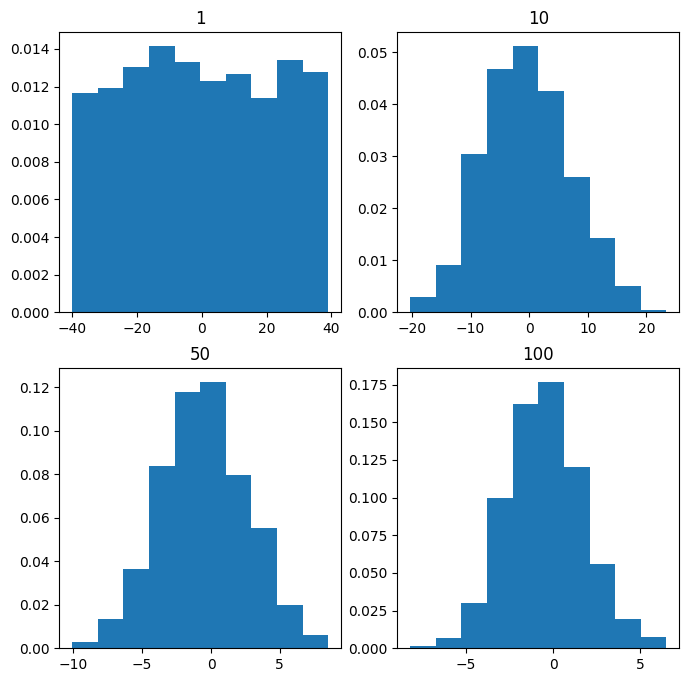

In [10]:
import numpy
import matplotlib.pyplot as plt

# number of sample
num = [1, 10, 50, 100]
# list of sample means
means = []

# Generating 1, 10, 30, 100 random numbers from -40 to 40
# taking their mean and appending it to list means.
for j in num:
    # Generating seed so that we can get same result
    # every time the loop is run...
    numpy.random.seed(1)
    x = [numpy.mean(
        numpy.random.randint(
            -40, 40, j)) for _i in range(1000)]
    means.append(x)
k = 0

# plotting all the means in one figure
fig, ax = plt.subplots(2, 2, figsize =(8, 8))
for i in range(0, 2):
    for j in range(0, 2):
        # Histogram for each x stored in means
        ax[i, j].hist(means[k], 10, density = True)
        ax[i, j].set_title(label = num[k])
        k = k + 1

plt.show()